In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
# 1. Load the Geographic Data
print("Loading Geographic data...")
geographic_data1 = pd.read_excel(r"D:\Docs\EV Project\G-EV merged data.xlsx")
geographic_data2 = pd.read_excel(r"D:\Docs\EV Project\G-EVStats.xlsx")
geographic_data = pd.concat([geographic_data1, geographic_data2], axis=0)

Loading Geographic data...


In [42]:
# 2. Data Preprocessing
def preprocess_data(df):
    if df.empty:
        print("Warning: Empty dataframe received for preprocessing.")
        return df

    df = df.dropna()  # Drop missing values
    df = df.select_dtypes(include=[np.number])  # Keep numeric data only

    if df.empty:
        print("Warning: No numeric data left after dropping missing values.")
        return df

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    return pd.DataFrame(scaled_data, columns=df.columns)

geographic_data = preprocess_data(geographic_data)
print("Done")

Done


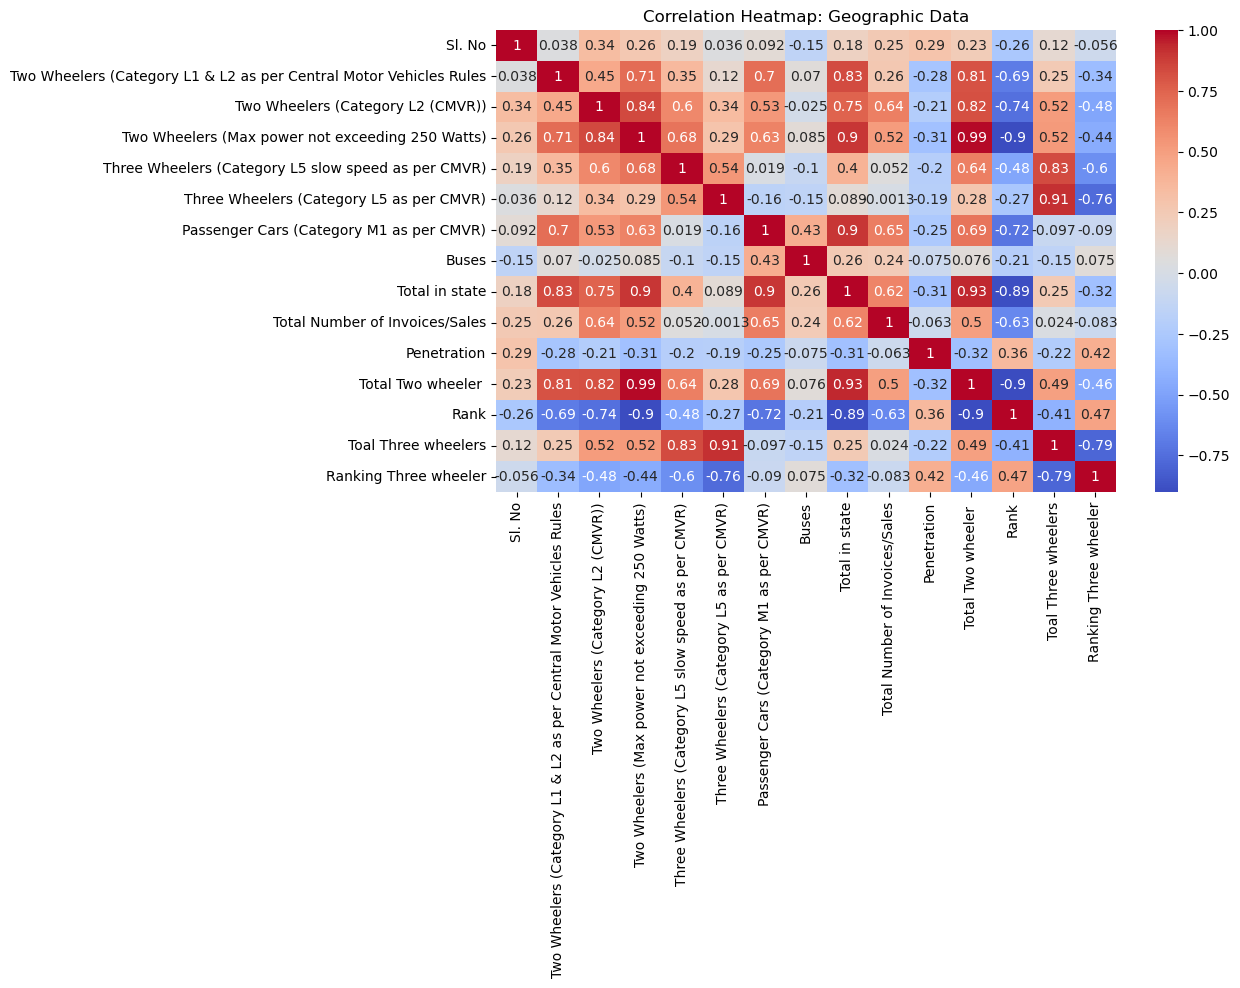

In [21]:
# 3. Correlation Heatmap
def visualize_data(df, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title(f"Correlation Heatmap: {title}")
    plt.show()

visualize_data(geographic_data, "Geographic Data")

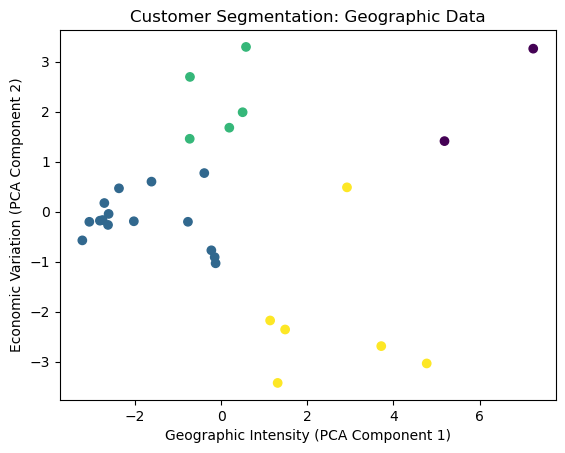

array([1, 1, 2, 2, 1, 2, 1, 3, 1, 3, 0, 1, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1,
       3, 3, 1, 1, 0, 2])

In [36]:
import warnings

# Ignore the specific warning
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows")

# 4. Clustering for Customer Segmentation
def perform_clustering(df, kmeans_clusters, title):
    if df.empty:
        print(f"Warning: {title} data is empty. Skipping clustering.")
        return []

    kmeans = KMeans(n_clusters=kmeans_clusters, random_state=42)
    clusters = kmeans.fit_predict(df)
    
    # Reduce dimensions using PCA for visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(df)
    
    # Rename PCA components for clarity
    geographic_intensity = reduced_data[:, 0]  # Renaming PCA Component 1
    economic_variation = reduced_data[:, 1]    # Renaming PCA Component 2
    
    # Visualize PCA components with custom names
    plt.scatter(geographic_intensity, economic_variation, c=clusters, cmap='viridis')
    plt.title(f"Customer Segmentation: {title}")
    plt.xlabel("Geographic Intensity (PCA Component 1)")
    plt.ylabel("Economic Variation (PCA Component 2)")
    plt.show()

    return clusters

# Use the updated name 'kmeans_clusters' instead of 'num_clusters'
kmeans_clusters = 4
perform_clustering(geographic_data, kmeans_clusters, "Geographic Data")

In [23]:
# 5. Combining Data - Debugging DataFrame Creation
def create_combined_dataset():
    try:
        array1 = np.random.rand(100)  
        array2 = np.random.rand(100)  
        array3 = np.random.rand(100)  

        # Debugging: Check lengths of arrays
        print(f"Lengths of arrays: array1={len(array1)}, array2={len(array2)}, array3={len(array3)}")
        min_length = min(len(array1), len(array2), len(array3))
        
        # Trim arrays to the minimum length
        array1 = array1[:min_length]
        array2 = array2[:min_length]
        array3 = array3[:min_length]

        # Create DataFrame
        combined_data_result = pd.DataFrame({
            'column1': array1,
            'column2': array2,
            'column3': array3
        })

        print("Combined data created successfully.")
        return combined_data_result

    except Exception as e:
        print(f"An error occurred while creating the combined dataset: {e}")
        return None

# Create combined dataset
combined_data_result = create_combined_dataset()

if combined_data_result is not None:
    print("Combined Dataset Created Successfully")
    print(combined_data_result.head())
else:
    print("Failed to create combined dataset due to array length mismatch.")


Lengths of arrays: array1=100, array2=100, array3=100
Combined data created successfully.
Combined Dataset Created Successfully
    column1   column2   column3
0  0.689697  0.955393  0.173927
1  0.723882  0.206339  0.643395
2  0.753549  0.043449  0.278756
3  0.891013  0.760052  0.682895
4  0.201842  0.328979  0.244177
